In [ ]:
import numpy as np
import gym
import random
import time
from   IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns

The follow cell is adapted from https://github.com/gheisenberg/AML.

In [ ]:
env = gym.make("FrozenLake-v1")
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))

num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99 # gamma

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.01

rewards_all_episodes = []

# Q-learning algorithm

# loop: for a single episode
for episode in range(num_episodes):
    # initialize 'new episode' parameters
    state = env.reset()[0]
    ''' The done variable just keeps track of whether or not your episode is finished.
    Initialize it to False when first starting the episode and you will see later where 
    it will get updated to notify you when the episode is over.'''
    done = False
    
    ''' Keep track of the rewards within the current episode as well.
    Hence, set rewards_current_episode = 0 since you start 
    with no rewards at the beginning of each episode.'''
    rewards_current_episode = 0

    # nested loop: for a single time-step
    for step in range(max_steps_per_episode): 
        # Exploration-exploitation trade-off
        '''For each time-step within an episode set your exploration_rate_threshold 
        to a random number between 0 and 1. This will be used to determine whether 
        your agent will explore or exploit the environment in this time-step.'''
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:]) 
        else:
            action = env.action_space.sample()

        # Take new action
        '''After action is chosen, take that action by calling step() on your env object and 
        pass your action to it. The function step() returns a tuple containing the new state, 
        the reward for the action you took, whether or not the action ended the episode and 
        diagnostic information regarding the environment (helpful for debugging).'''
        new_state, reward, done, truncated, info = env.step(action)
        # Update Q-table for Q(s,a)
        '''Compare this implementation with the equation in the course slides.'''
        ######
        ######
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
        learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        #####
        #####
        '''Set your current state to the new_state that was returned when taking the last action 
        and then update the rewards from your current episode by adding the reward you received 
        for your previous action.'''
        # Set new state
        state = new_state
        # Add new reward 
        rewards_current_episode += reward 
        '''Then, check to see if your last action ended the episode 
        (game over by agent stepping in a hole or reaching the goal)! 
        If the action did end the episode, then jump out of this loop and start the next episode.
        Otherwise, transition to the next time-step.'''
        if done == True: 
            break
            

    # Exploration rate decay
    '''Once an episode is finished, you need to update your exploration_rate using exponential decay, 
    which just means that the exploration rate decays at a rate proportional to its current value. 
    You can decay the exploration_rate using the formula above, which makes use of all the exploration 
    rate parameters that were defined above in the hyperparameter section.'''
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    
    # Add current episode reward to total rewards list and move on to the next episode
    rewards_all_episodes.append(rewards_current_episode)

Visualise the run of the original hyperparameter set-up:

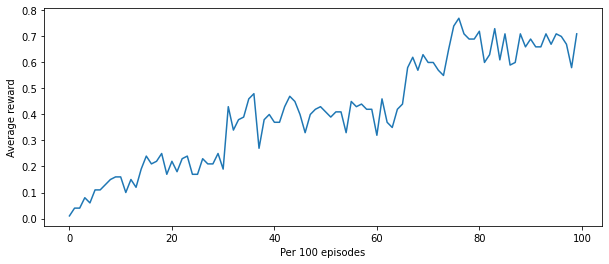

In [58]:
avg_hundred_rewards = []
rewards_per_hundred_episodes = np.split(np.array(rewards_all_episodes),num_episodes/100)
count = 100
for r in rewards_per_hundred_episodes:
    avg_hundred_rewards.append(sum(r/100))
    count += 100
    
ax = plt.figure(figsize=(10, 4))
plt.plot(avg_hundred_rewards);
plt.xlabel("Per 100 episodes")
plt.ylabel("Average reward");

The average reward received slowly increases over time, as the q values in the q value table are optimised - however there is still a lot of oscillation.

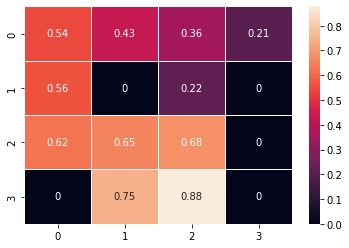

In [60]:
values = np.max(q_table, axis=1).reshape(4, 4)
sns.heatmap(values, annot=True, linewidth=0.5);

<img src="https://launchyourintelligentapphome.files.wordpress.com/2019/05/frozenlake_legended.png?w=531" style="float: center;" width="600">

If we take the best action from each row (state) in the q table, then we can see the value (function) for each state.

The optimum path matches to the image of the environment!

The following plots show the q values for each action and state:

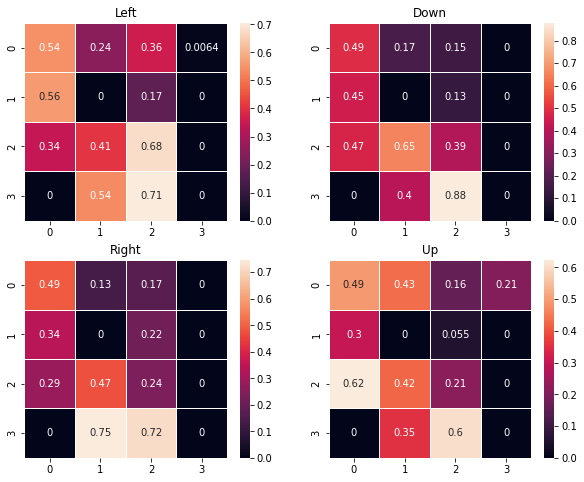

In [83]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.heatmap(q_table[:, 0].reshape(4, 4), ax=axes[0, 0], annot=True, linewidth=0.5);
sns.heatmap(q_table[:, 1].reshape(4, 4), ax=axes[0, 1], annot=True, linewidth=0.5);
sns.heatmap(q_table[:, 2].reshape(4, 4), ax=axes[1, 0], annot=True, linewidth=0.5);
sns.heatmap(q_table[:, 3].reshape(4, 4), ax=axes[1, 1], annot=True, linewidth=0.5);
axes[0, 0].set_title("Left")
axes[0, 1].set_title("Down")
axes[1, 0].set_title("Right")
axes[1, 1].set_title("Up");

## Tuning the parameters

In [108]:
def run_rl(num_episodes=10000,
        max_steps_per_episode = 100,
        learning_rate = 0.1,
        discount_rate = 0.99,
        exploration_rate = 1,
        max_exploration_rate = 1,
        min_exploration_rate = 0.01,
        exploration_decay_rate = 0.01):

    env = gym.make("FrozenLake-v1")
    q_table = np.zeros((env.observation_space.n, env.action_space.n))

    rewards_all_episodes = []
    
    for episode in range(num_episodes):
        state = env.reset()[0]
        done = False

        rewards_current_episode = 0

        for step in range(max_steps_per_episode): 
            exploration_rate_threshold = random.uniform(0, 1)
            if exploration_rate_threshold > exploration_rate:
                action = np.argmax(q_table[state,:]) 
            else:
                action = env.action_space.sample()

            new_state, reward, done, truncated, info = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

            state = new_state
            rewards_current_episode += reward 

            if done == True: 
                break

        exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)

        rewards_all_episodes.append(rewards_current_episode)
    
    avg_hundred_rewards = []
    rewards_per_hundred_episodes = np.split(np.array(rewards_all_episodes),num_episodes/100)
    
    count = 100
    for r in rewards_per_hundred_episodes:
        avg_hundred_rewards.append(sum(r/100))
        count += 100
    ax = plt.figure(figsize=(10, 4))
    plt.plot(avg_hundred_rewards);
    plt.xlabel("Per 100 episodes")
    plt.ylabel("Average reward");
    plt.show()
    
    values = np.max(q_table, axis=1).reshape(4, 4)
    sns.heatmap(values, annot=True, linewidth=0.5);
    plt.show()

### Num episodes

This is the number of games that we train the q values (agent) on.

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


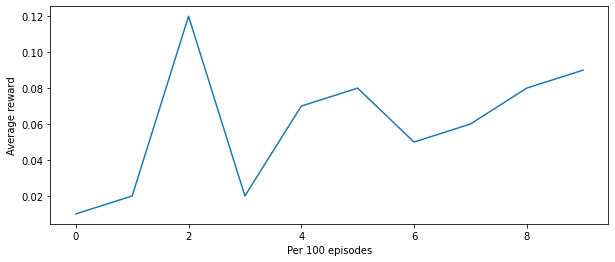

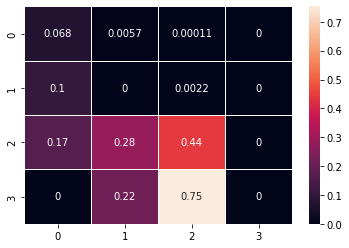

In [104]:
run_rl(num_episodes = 1000)

**At only 1000 episodes, there is not enough time for the agent to learn much.** It wins on average only around 10% of the games. However, it has still started to find a good path (values).

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


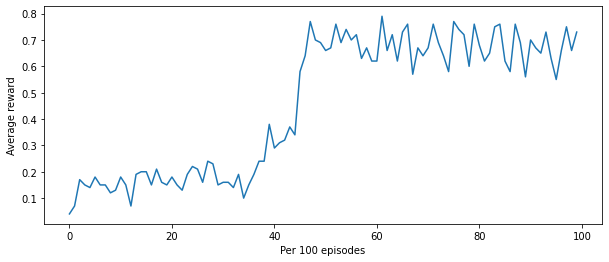

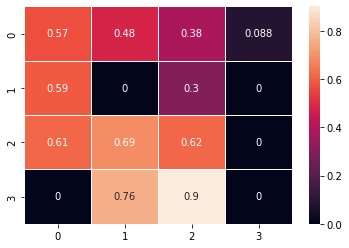

In [121]:
run_rl(num_episodes = 10000)

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


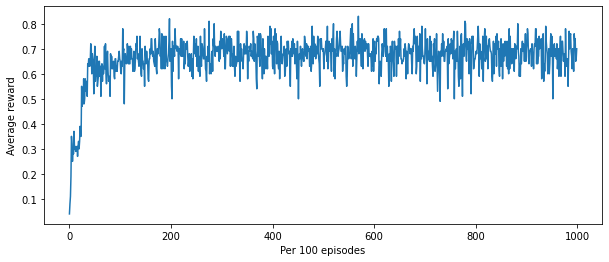

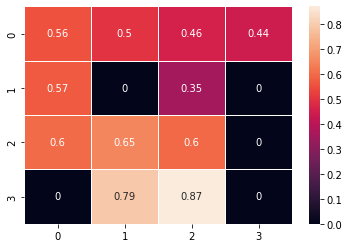

In [112]:
run_rl(num_episodes = 100000)

After only 10,000 episodes, the learning of the agent tends to plataeu, and the average reward stays the same (winning 80% of the time). The most interesting difference is in the value table - the values in all of the states are higher, as the agent has learned how to get the reward, from more of the states (in particular, the top right states).

### Max steps per episode

This is the maximum number of steps that the agent can take within the environment, during a game.

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


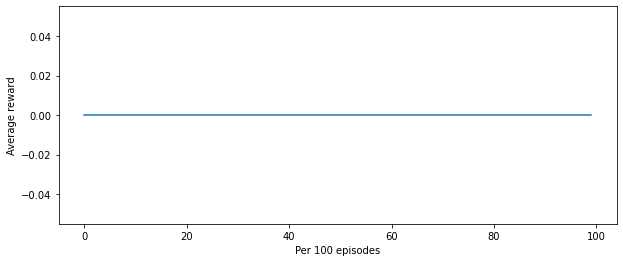

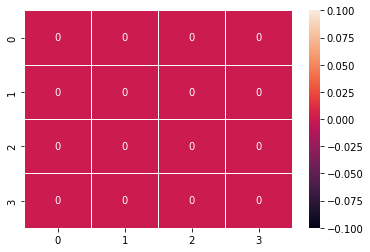

In [140]:
run_rl(max_steps_per_episode=10)

**If the agent is only given 10 steps per episode, then it never learns anything.** This is because it is never able to reach the frisbee within 10 steps, hence it never recieves the reward, and thus never learns how to optimise its policy to receive the reward.

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


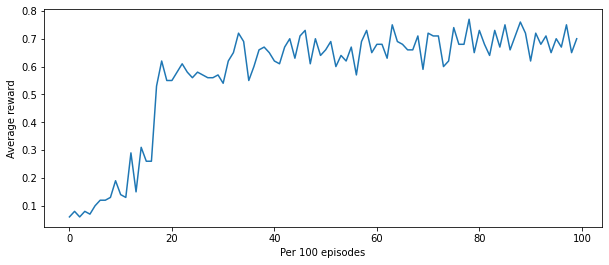

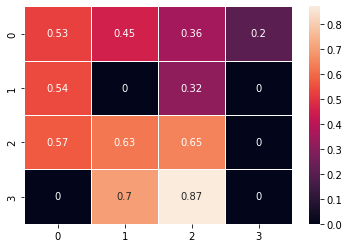

In [134]:
run_rl(max_steps_per_episode=100)

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


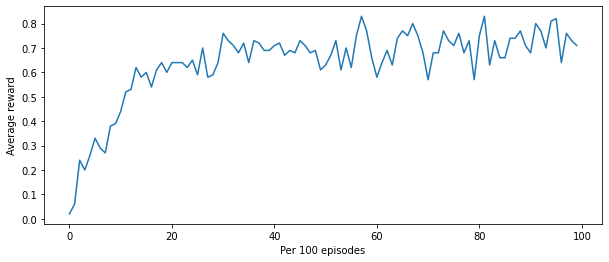

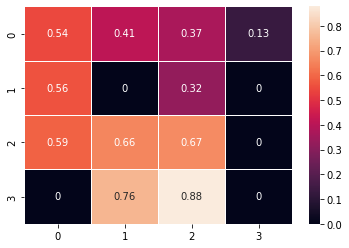

In [137]:
run_rl(max_steps_per_episode=1000)

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


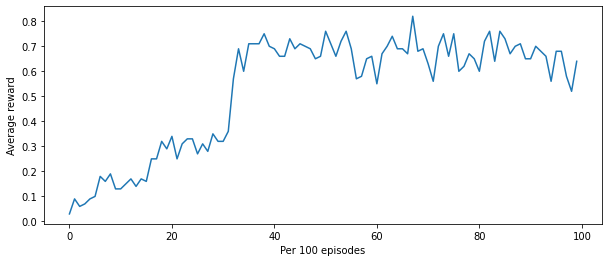

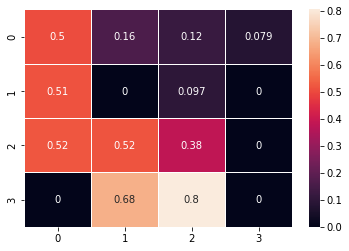

In [138]:
run_rl(max_steps_per_episode=10000)

Giving the agent many more steps per episode doesn't really improve on the learning. This is likely because the game automatically ends when the agent falls in the hole, so it is very unlikely that the agent ever reaches the maximum number of steps anyway.

### Learning rate

The learning rate indicates by how much we update the q values in the q table, after each game. The smaller this is, the more slowly we update the q values in the table. if it is 0, then nothing could be learned. If it is 1, then the q values are always replaced by the q value learned from the previous game.

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


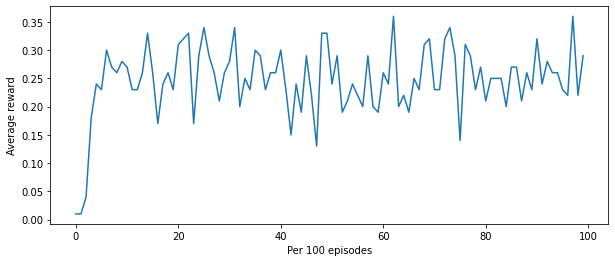

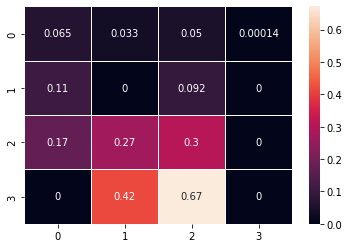

In [163]:
run_rl(learning_rate=0.001)

At a low learning rate, the agent is able to learn, but extremely slowly - after 10,000 episodes it still hasn't reached a high win rate.

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


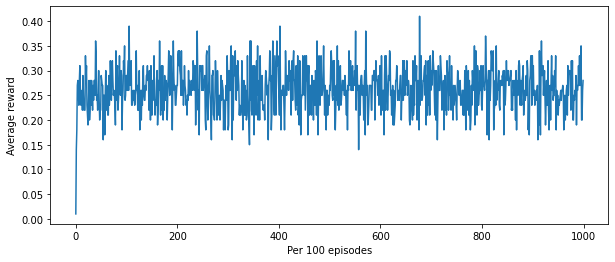

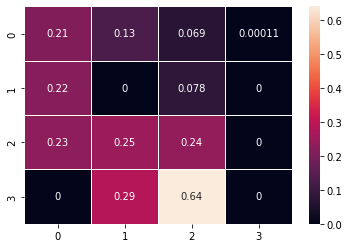

In [167]:
run_rl(learning_rate=0.001,
      num_episodes=100000)

Even after 100,000 episodes, at a learning rate of 0.001, the win rate stalls at 30%.

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


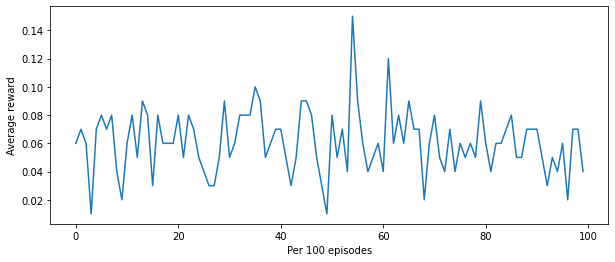

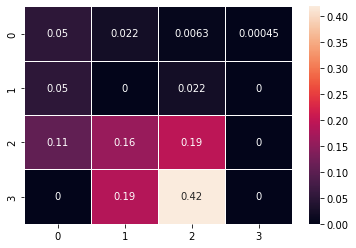

In [176]:
run_rl(learning_rate=0.01)

**The learning rate of 0.01 also shows very poor performance. I think this is because it is never able to learn a good policy (q values) to exploit, because the q values are updated so little from 0.**

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


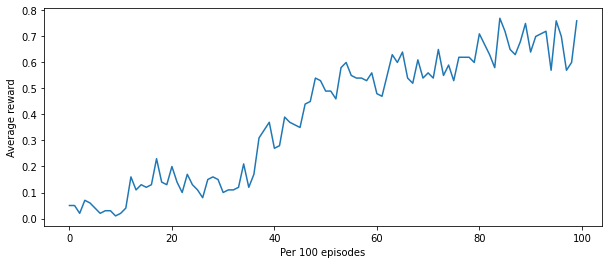

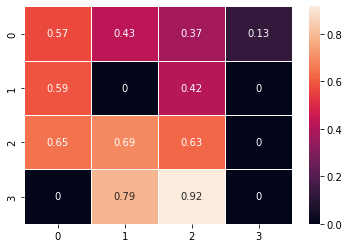

In [164]:
run_rl(learning_rate=0.1)

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


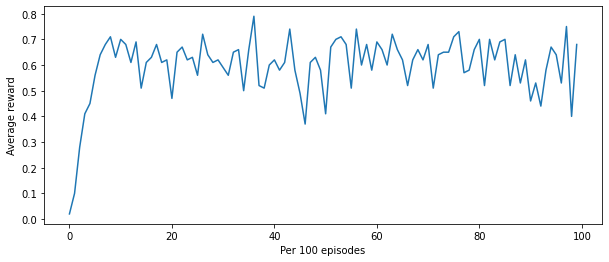

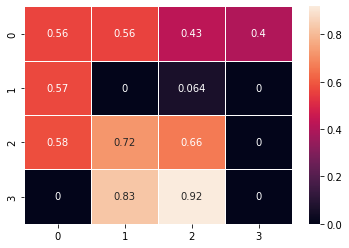

In [153]:
run_rl(learning_rate=0.5)

The learning rate of 0.5 works quite well - it learns to reach a high win rate quickly. It oscillates more afterwards though, compared to a learning rate of 0.1.

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


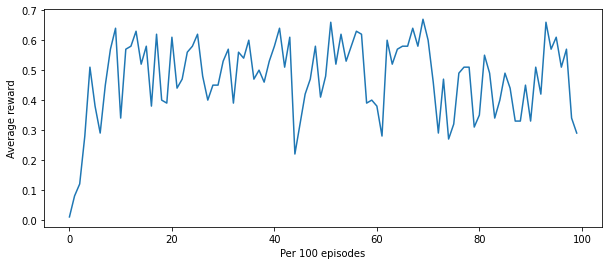

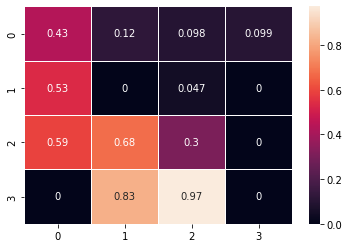

In [158]:
run_rl(learning_rate=0.8)

With a learning rate of 0.8, the agent is able to learn much more quickly how to win the game, with a 70% win rate very early on in the episodes. However, the win rate then fluctuates more strongly.

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


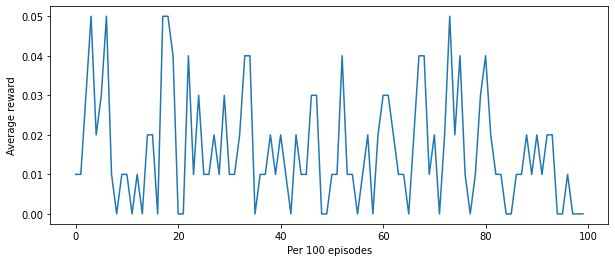

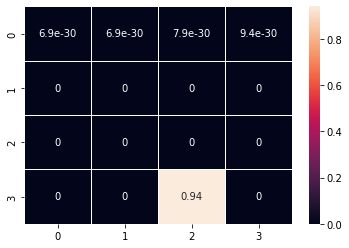

In [155]:
run_rl(learning_rate=1)

With a learning rate of 1, the agent isn't able to learn anything (except for the one specific state that it can win from), as the results from each episode are so varied, that it never finds optimal q values.

### * Discount rate

The discount rate represents the "gamma" hyperparameter in the expected discounted return of rewards - **the smaller the discount rate, the more we discount/don't care about rewards in the future. The higher the discount rate, the more important (far off) future rewards become.**

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


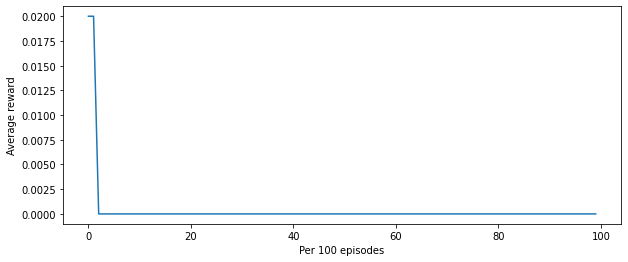

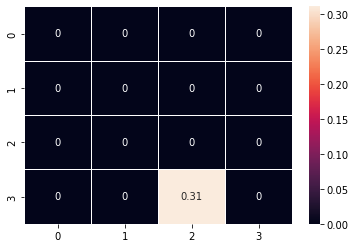

In [182]:
run_rl(discount_rate=0)

By only caring about the rewards "right now", it is only able to learn about the future returns from one state - the one directly before the reward!

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


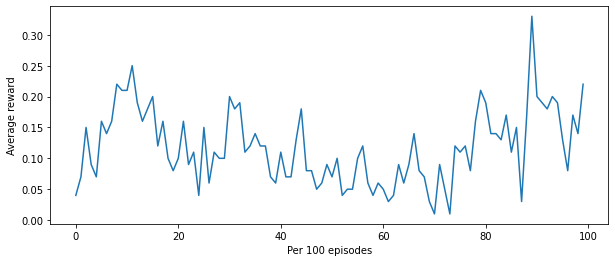

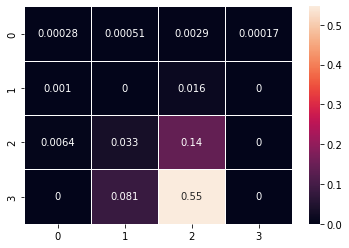

In [183]:
run_rl(discount_rate=0.5)

At 0.5, it is able to learn about a few more states before the reward state - but not many!

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


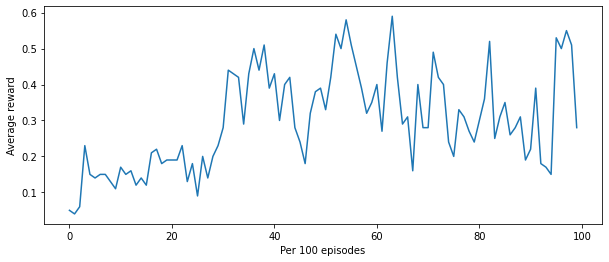

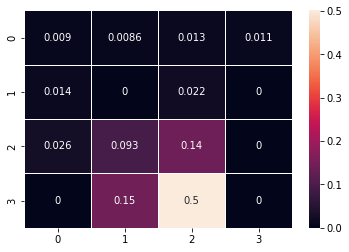

In [190]:
run_rl(discount_rate=0.8)

Even at 0.8, the discount rate is still too low.

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


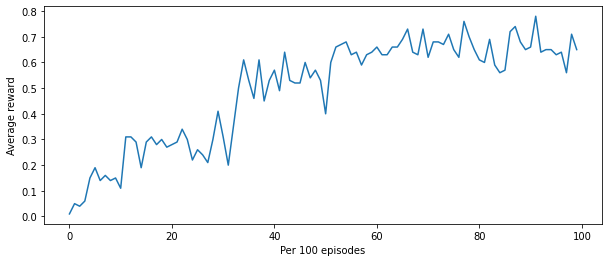

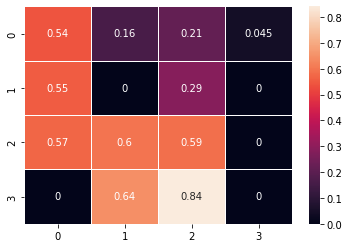

In [180]:
run_rl(discount_rate=0.99)

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


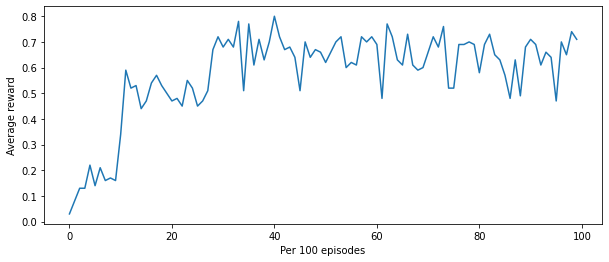

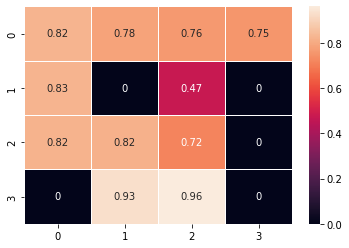

In [254]:
run_rl(discount_rate=0.999)

At a discount rate of 0.999, the agent is able to learn how to win from almost any state!

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


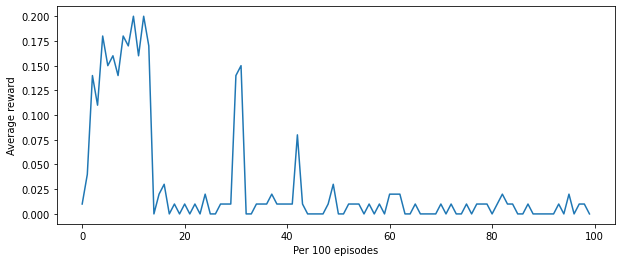

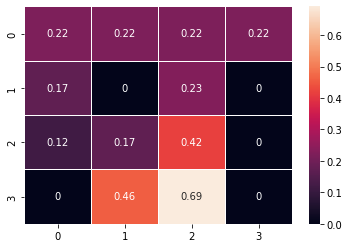

In [181]:
run_rl(discount_rate=1)

The agent cannot learn what to do at the beginning of the game, and hence gets very low rewards.

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


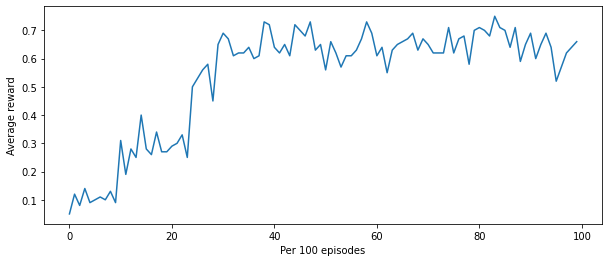

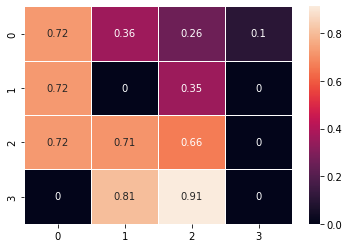

In [186]:
run_rl(discount_rate=1)

At gamma=1, the Bellman equation is no longer valid, as the sum is no longer finite. Depending on the random element (random game playing), the agent either does extremely badly and learns an extremely bad policy, or does very well, and learns an extremely good policy!

### Max exploration rate

The maximum exploration rate represents how far we can go into only exploration. With a lower max starting exploration rate, the agent starts exploiting the policy that it has learned more quickly, hence it learns to win more quickly. However, there is a random element - it must have gained good information from the first few episodes where it is allowed to explore, in order to have learned a good policy that it can then exploit.

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


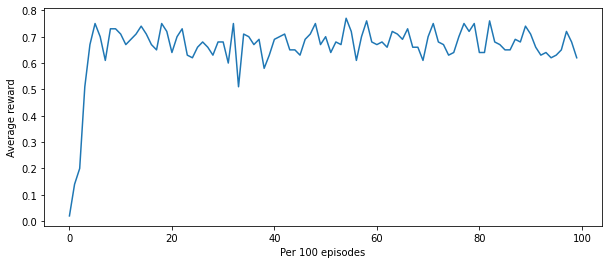

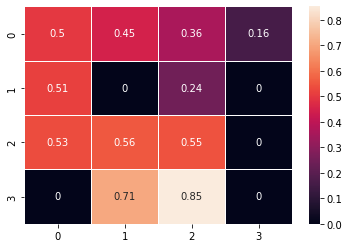

In [220]:
run_rl(max_exploration_rate=1)

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


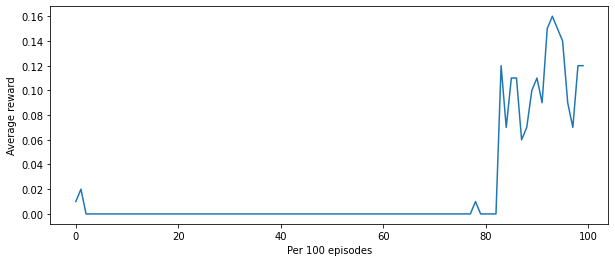

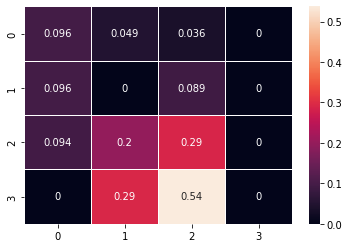

In [229]:
run_rl(max_exploration_rate=0.8)

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


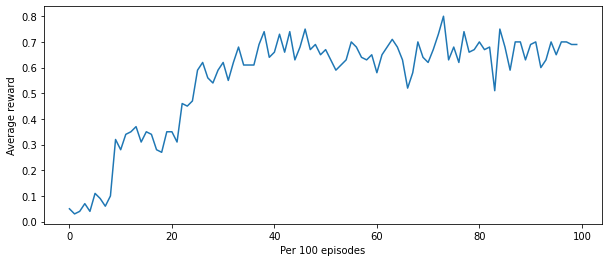

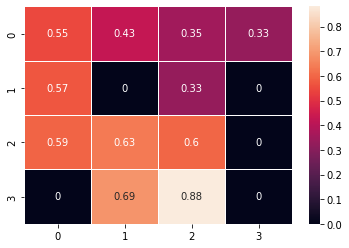

In [231]:
run_rl(max_exploration_rate=0.8)

**Depending on the random actions taken at the start, the agent eithers learns a lot, or nothing, at a max exploration rate of 0.8.**

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


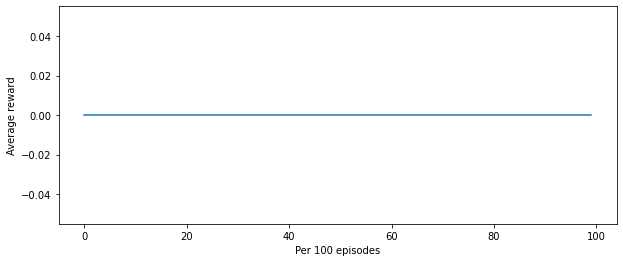

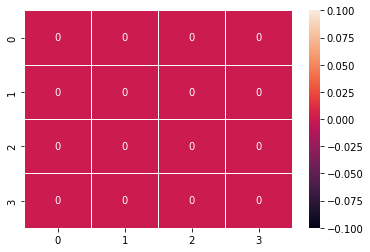

In [227]:
run_rl(max_exploration_rate=0.5)

At max exploration rates of 0.5 or lower, the agent starts exploiting too soon, before it has explored and learned enough about the environment - therefore it can't learn anything - it only ever exploits a bad policy.

### Min exploration rate

The minimum exploration rate represents how far we can go into only exploiting - if it was 0, then it can (eventually) reach having no exploration whatsoever, only exploitation.

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


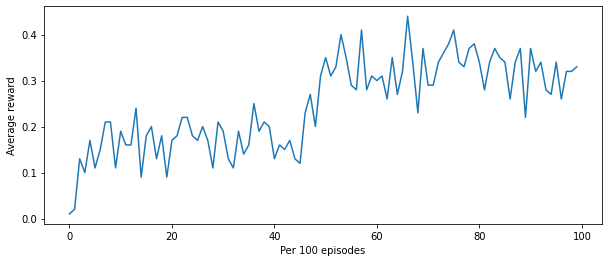

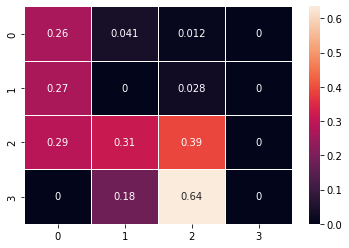

In [237]:
run_rl(min_exploration_rate=0)

By eventually a exploration of 0, the agent picks one path to follow, and rarely deviates from it.

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


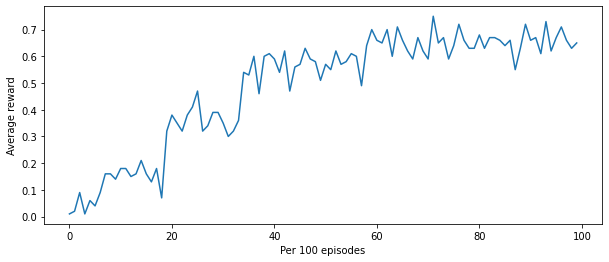

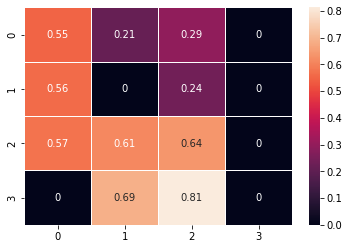

In [239]:
run_rl(min_exploration_rate=0.01)

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


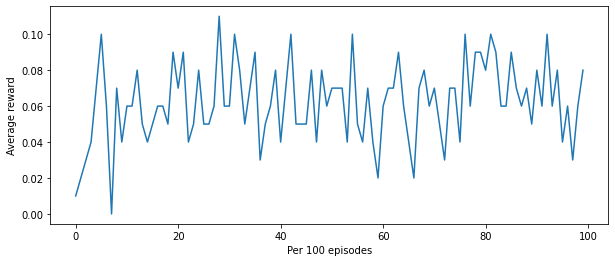

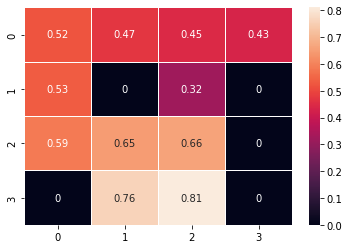

In [234]:
run_rl(min_exploration_rate=0.5)

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


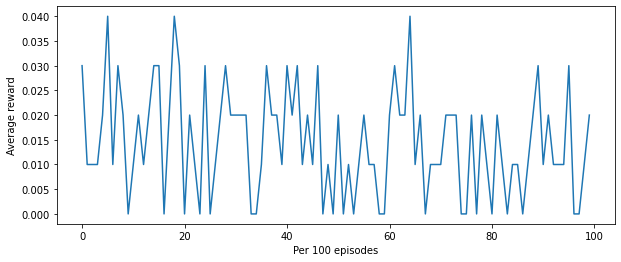

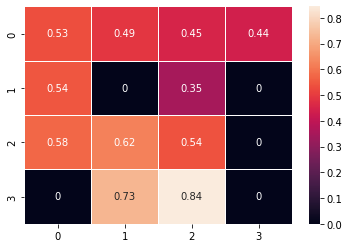

In [235]:
run_rl(min_exploration_rate=1)

Although the agent has learned a good policy, as evidenced by the state values, as we force it to very often explore, the average reward is very low.

### Exploration decay rate

The exploration decay rate, is how quickly we decay from exploration to exploitation over time.

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


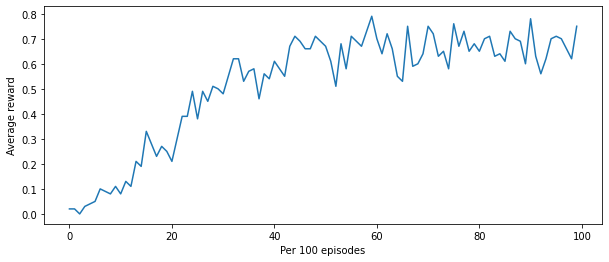

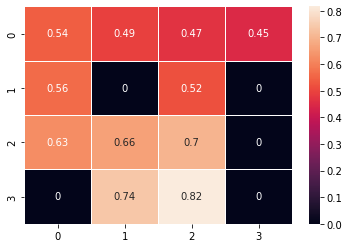

In [251]:
run_rl(exploration_decay_rate=0.001)

By allowing the agent a lot of time to explore (slower decay rate) it is able to learn a lot about the environment, and hence learns a very good policy.

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


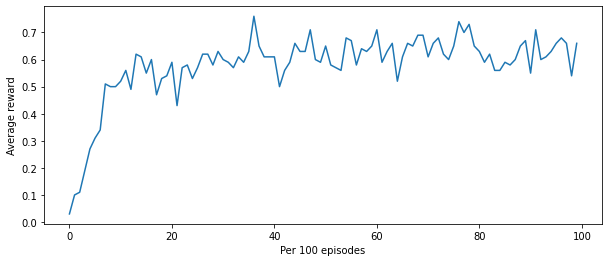

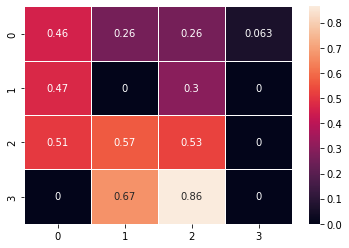

In [240]:
run_rl(exploration_decay_rate=0.01)

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


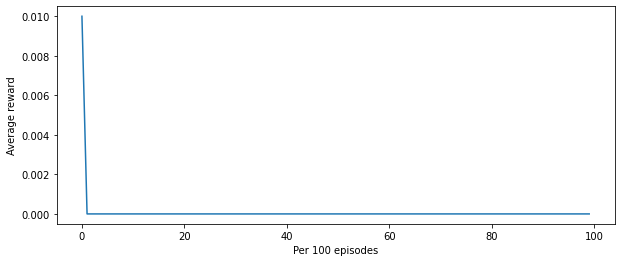

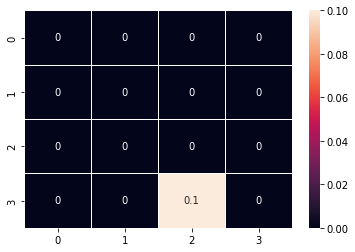

In [248]:
run_rl(exploration_decay_rate=0.1)

At a decay rate of 0.1, the learning decays too quickly from exploration to exploitation - the agent is not able to learn enough, and thus still has a bad policy, when it starts exploiting.

## Optimised Parameters

In [261]:
def run_and_test_rl(num_episodes=10000,
        max_steps_per_episode = 100,
        learning_rate = 0.1,
        discount_rate = 0.99,
        exploration_rate = 1,
        max_exploration_rate = 1,
        min_exploration_rate = 0.01,
        exploration_decay_rate = 0.01):

    env = gym.make("FrozenLake-v1")
    q_table = np.zeros((env.observation_space.n, env.action_space.n))

    rewards_all_episodes = []
    
    for episode in range(num_episodes):
        state = env.reset()[0]
        done = False

        rewards_current_episode = 0

        for step in range(max_steps_per_episode): 
            exploration_rate_threshold = random.uniform(0, 1)
            if exploration_rate_threshold > exploration_rate:
                action = np.argmax(q_table[state,:]) 
            else:
                action = env.action_space.sample()

            new_state, reward, done, truncated, info = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

            state = new_state
            rewards_current_episode += reward 

            if done == True: 
                break

        exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)

        rewards_all_episodes.append(rewards_current_episode)
    
    avg_hundred_rewards = []
    rewards_per_hundred_episodes = np.split(np.array(rewards_all_episodes),num_episodes/100)
    
    
    count = 100
    for r in rewards_per_hundred_episodes:
        avg_hundred_rewards.append(sum(r/100))
        count += 100
    ax = plt.figure(figsize=(10, 4))
    plt.plot(avg_hundred_rewards);
    plt.xlabel("Per 100 episodes")
    plt.ylabel("Average reward");
    plt.show()
    
    values = np.max(q_table, axis=1).reshape(4, 4)
    sns.heatmap(values, annot=True, linewidth=0.5);
    plt.show()
    
    testing_rewards = []
    for episode in range(1000):
        state = env.reset()[0]
        done = False

        rewards_current_episode = 0

        for step in range(max_steps_per_episode): 
            action = np.argmax(q_table[state,:]) 
            new_state, reward, done, truncated, info = env.step(action)
            state = new_state
            rewards_current_episode += reward 
            if done == True: 
                break

        testing_rewards.append(rewards_current_episode)
        
    return testing_rewards

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


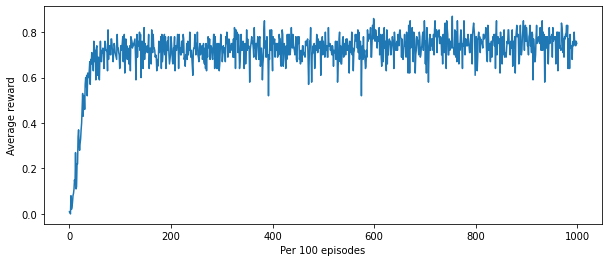

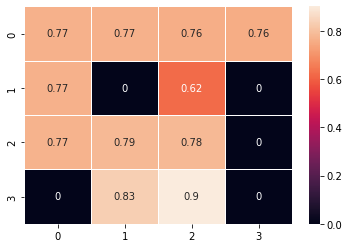

In [258]:
run_rl(
    num_episodes=100000,
    max_steps_per_episode=1000,
    learning_rate=0.1,
    discount_rate=0.999,
    exploration_rate=1,
    max_exploration_rate=1,
    min_exploration_rate=0.01,
    exploration_decay_rate=0.001,
)

C:\Users\Natasha\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


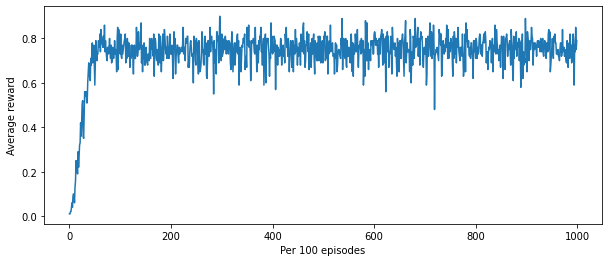

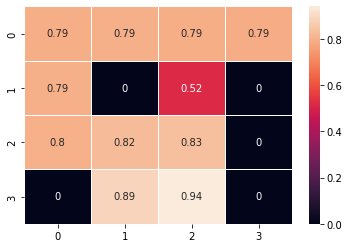

In [263]:
optimised_rewards = run_and_test_rl(
    num_episodes=100000,
    max_steps_per_episode=1000,
    learning_rate=0.1,
    discount_rate=0.999,
    exploration_rate=1,
    max_exploration_rate=1,
    min_exploration_rate=0.01,
    exploration_decay_rate=0.001,
)

In [267]:
sum(optimised_rewards)/len(optimised_rewards)*100

82.39999999999999

The agent has learned a policy so that it will win the game 82% of the time, when it only exploits the policy, and does not explore at all.

## Training a DQN

In [10]:
import torch
import torch.nn as nn
from tqdm import tqdm
import gym
import random
import numpy as np
from collections import namedtuple, deque
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
env = gym.make("FrozenLake-v1")
    
# code based on: https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
    
# Buffer Memory class to store all of the steps in
Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward'))
class BufferMemory(object):
    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)
    def push(self, *args):
        self.memory.append(Transition(*args))
    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)
    def __len__(self):
        return len(self.memory)

# The simple neural network that will be trained
class DQN(nn.Module):
    def __init__(self, num_state_info, num_actions):
        super().__init__()
        self.layer_stack = nn.Sequential(
        nn.Linear(num_state_info, 32),
        nn.Linear(32, 32),
        nn.ReLU(),
        nn.Linear(32, num_actions)
        )
    def forward(self, x):
        return self.layer_stack(x)

policy_net = DQN(1, 4).to(device)
target_net = DQN(1, 4).to(device)
target_net.load_state_dict(policy_net.state_dict())

# Parameters
batch_size = 128
gamma = 0.9
epsilon_max = 0.9
epsilon_threshold = epsilon_max
epsilon_min = 0.05
epsilon_decay = 0.0001
tau = 0.01
learning_rate = 0.001
max_steps_per_episode = 100
num_episodes = 10000

optimizer = torch.optim.Adam(policy_net.parameters(), lr=learning_rate)
criterion = nn.SmoothL1Loss()

memory = BufferMemory(10000) # capacity of 10000 games in the buffer

rewards_all_episodes = []

# each episode
for episode in tqdm(range(num_episodes)):
    
    state, info = env.reset()
    state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
    rewards_current_episode = 0

    # each step in the episode
    for step in range(max_steps_per_episode):
        
        # select an action, either randomly or from the policy network
        random_sample = random.uniform(0, 1)
        if random_sample > epsilon_threshold:
            with torch.no_grad():
                action = policy_net(state).max(0)[1].view(1, 1)
        else:
            action = torch.tensor([[env.action_space.sample()]], device=device, dtype=torch.long)
        
        # execute the action chosen by the policy net
        next_state_info, reward, terminated, truncated, info = env.step(action.item())
        rewards_current_episode += reward 
        reward = torch.tensor([reward], device=device)
        done = terminated or truncated
        
        # determine whether the game should end
        if terminated:
            next_state = None
        else:
            next_state = torch.tensor(next_state_info, dtype=torch.float32, device=device).unsqueeze(0)

        # store the step
        memory.push(state, action, next_state, reward)

        # move to the next state
        state = next_state

        # sample some episodes to train on
        if len(memory) >= batch_size:
            transitions = memory.sample(batch_size)
            batch = Transition(*zip(*transitions))

            # we cannot calculate the "future rewards" of a final state, so exclude all final states
            non_final_mask = torch.tensor(tuple(map(lambda s: s is not None, batch.next_state)), device=device, dtype=torch.bool)
            non_final_next_states = torch.cat([s for s in batch.next_state if s is not None]).unsqueeze(1)

            # get all of the states, actions and rewards
            state_batch = torch.cat(batch.state).unsqueeze(1)
            action_batch = torch.cat(batch.action)
            reward_batch = torch.cat(batch.reward)

            # find the values corresponding to the two sides of Bellman equation
            # left side with policy net
            state_action_values = policy_net(state_batch).gather(1, action_batch)
            # right side with target net
            next_state_values = torch.zeros(batch_size, device=device)
            with torch.no_grad():
                next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0]
            expected_state_action_values = reward_batch + (gamma * next_state_values)

            # find the loss and optimise the policy net
            loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))
            optimizer.zero_grad()
            loss.backward()
            # use gradient clipping with Huber loss
            torch.nn.utils.clip_grad_value_(policy_net.parameters(), 100)
            optimizer.step()

        # slowly update the target network 
        target_net_state_dict = target_net.state_dict()
        policy_net_state_dict = policy_net.state_dict()
        for key in policy_net_state_dict:
            target_net_state_dict[key] = policy_net_state_dict[key]*tau + target_net_state_dict[key]*(1-tau)
        target_net.load_state_dict(target_net_state_dict)
        
        # end if the episode ends
        if done:
            break
            
    epsilon_threshold = epsilon_min + (epsilon_max - epsilon_min) * np.exp(-epsilon_decay*episode)
    rewards_all_episodes.append(rewards_current_episode)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [05:11<00:00, 32.07it/s]


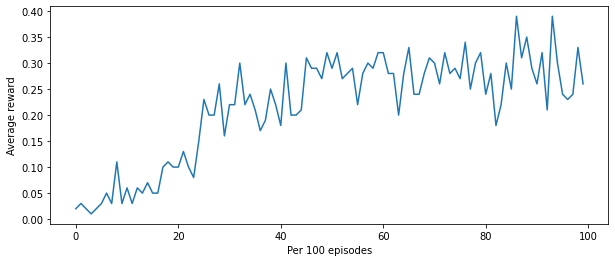

In [84]:
avg_hundred_rewards = []
rewards_per_hundred_episodes = np.split(np.array(rewards_all_episodes),num_episodes/100)
count = 100
for r in rewards_per_hundred_episodes:
    avg_hundred_rewards.append(sum(r/100))
    count += 100
    
ax = plt.figure(figsize=(10, 4))
plt.plot(avg_hundred_rewards);
plt.xlabel("Per 100 episodes")
plt.ylabel("Average reward");

Conclusion - it is very difficult to train a good policy network! In particular, controlling the update of the target network from the policy network is very tricky, and it was very difficult to find hyperparameters that allowed the DQN to learn anything, without just "oscillating" in place.